In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [98]:
from sklearn.ensemble import AdaBoostClassifier

In [2]:
import os
os.chdir("C:/Users/Boom/Documents/Data projects")

In [3]:
#remove the X1,X2, etc
# set "ID" variable as index
df = pd.read_csv("default of credit card clients.csv", skiprows=1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
#set "ID" column as index
df.set_index("ID", inplace = True)

In [5]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
print(df.shape)

(30000, 24)


In [7]:
y = df["default payment next month"]
X = df.drop("default payment next month",axis=1)

Text(0.5, 1.0, 'Class histogram')

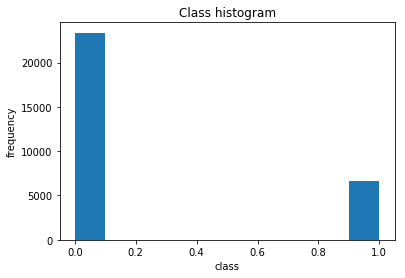

In [8]:
plt.hist(y)
plt.xlabel('class')
plt.ylabel('frequency')
plt.title('Class histogram')

## Naive Bayesian Classifier

In [168]:
normalized_X = preprocessing.normalize(X)
X_train, X_test, y_train, y_test = train_test_split(normalized_X, y, test_size = 0.20)

In [169]:
#guassian classifier
gnb = GaussianNB()
#train the model
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [170]:
#create predictions
y_pred = gnb.predict(X_test)

In [171]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7671666666666667


In [97]:
X.corr()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
LIMIT_BAL,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,...,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595
SEX,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,...,-0.024563,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766
EDUCATION,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,...,0.013002,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200
MARRIAGE,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,...,-0.024909,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641
AGE,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,...,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478
PAY_0,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,...,0.179785,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673
PAY_2,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,...,0.224146,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500
PAY_3,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,...,0.227494,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861
PAY_4,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,...,0.244983,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565
PAY_5,-0.249411,-0.055064,0.097520,0.035629,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,...,0.243335,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027


# Principal Component Analysis (PCA)

In [81]:
#standardize data
standardized_X = StandardScaler().fit_transform(X)

C:\Users\Boom\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Boom\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [82]:
X_train, X_test, y_train, y_test = train_test_split(standardized_X, y, test_size = 0.20)

In [90]:
#choose minimum number of components while retaining 98% of variance
pca= PCA(0.99)

In [91]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.99, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [92]:
#Apply the mapping to train and test
X_train_pc = pca.transform(X_train)
X_test_pc = pca.transform(X_test)

In [93]:
print(X_train_pc.shape)

(24000, 19)


In [60]:
#PCA made 19 principal components that contain 98% of the variance

# PCA - NB

In [94]:
#guassian classifier
gnb = GaussianNB()
#train the model
gnb.fit(X_train_pc, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [95]:
#create predictions
y_pred = gnb.predict(X_test_pc)

In [96]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7221666666666666


NB performs worse after PCA

## Gradient Boosting Classifier

In [14]:
#running gbc with default parameters, no parameter tuning
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [15]:
y_pred = gbc.predict(X_test)

In [16]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("roc_auc: ",roc_auc)

roc_auc:  0.6381013745704467


In [17]:
#find which learning rate is best
learning_rates = [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1]
train_results = []
test_results = []
for i in learning_rates:
   gbc = GradientBoostingClassifier(learning_rate=i)
   gbc.fit(X_train, y_train)
   train_pred = gbc.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = gbc.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

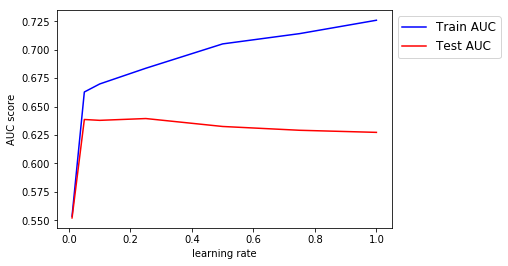

In [18]:
plt.plot(learning_rates, train_results,color='blue' , label="Train AUC")
plt.plot(learning_rates, test_results, color='red', label="Test AUC")
plt.legend(loc='upper left', bbox_to_anchor=(1,1), fontsize = 'large')
plt.ylabel("AUC score")
plt.xlabel("learning rate")
plt.show()

In [ ]:
# looks like 0.1 is best

In [19]:
#find which n_estimators is best
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
   gbc = GradientBoostingClassifier(n_estimators=estimator)
   gbc.fit(X_train, y_train)
   train_pred = gbc.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = gbc.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

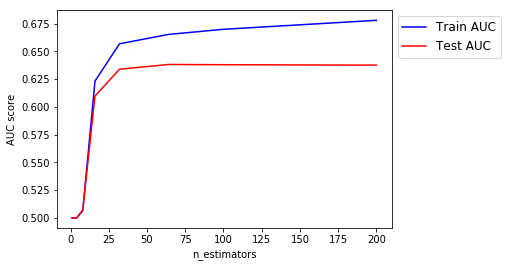

In [20]:
plt.plot(n_estimators, train_results, color='blue', label="Train AUC")
plt.plot(n_estimators, test_results, color='red', label="Test AUC")
plt.legend(loc='upper left', bbox_to_anchor=(1,1), fontsize = 'large')
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

In [21]:
#32 looks to be best

In [22]:
gbc = GradientBoostingClassifier(learning_rate=0.1, n_estimators=32)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("roc_auc: ",roc_auc)

roc_auc:  0.6339170655375551


In [27]:
gbc.score(X_test,y_test)

0.806

## Logistic Regression

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [33]:
model = LogisticRegression()

In [34]:
model.fit(X_train,y_train)

C:\Users\Boom\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [35]:
model.score(X_test,y_test)

0.7838333333333334

## Adaptive Boosting (Adaboost)

In [181]:
#note default base learner for adaboost is decision tree
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
abc = AdaBoostClassifier(n_estimators=50,learning_rate=.1)

In [176]:
model = abc.fit(X_train, y_train)

In [177]:
y_pred = model.predict(X_test)

In [178]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8125


In [182]:
abc = AdaBoostClassifier(n_estimators=100,learning_rate=0.1)

In [183]:
model = abc.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8256666666666667


In [184]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("roc_auc: ",roc_auc)

roc_auc:  0.651737574609729


## XGboost

In [133]:
from xgboost import XGBClassifier

In [134]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [135]:
#round predictions to 0 or 1
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [153]:
accuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy: ", accuracy)

Accuracy:  0.8288333333333333


## Neural Networks

In [154]:
X_train, X_test, y_train, y_test = train_test_split(standardized_X, y, test_size = 0.20)

In [156]:
from sklearn.neural_network import MLPClassifier

In [157]:
mlp = MLPClassifier(hidden_layer_sizes=(23,23,23))

In [158]:
mlp.fit(X_train,y_train)

C:\Users\Boom\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(23, 23, 23), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [159]:
y_pred = mlp.predict(X_test)

In [172]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [160]:
print(confusion_matrix(y_test,y_pred))

[[4372  315]
 [ 798  515]]


In [161]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8145
